#### Dataset
- https://www.kaggle.com/competitions/bike-sharing-demand/data

In [1]:
import pandas as pd

In [2]:
# 1. 데이터 가져오기
train = pd.read_csv('assets/train.csv')
test = pd.read_csv('assets/test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [5]:
# 2. datetime 컬럼을 datetime 자료형으로 변환(y-m-d h:m:s)
train['datetime'] = pd.to_datetime(train['datetime'], format='%Y-%m-%d %H:%M:%S')

# 컬럼 생성
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  day         10886 non-null  int32         
 15  hour        10886 non-null  int32         
 16  minute      10886 non-

<Axes: xlabel='second', ylabel='count'>

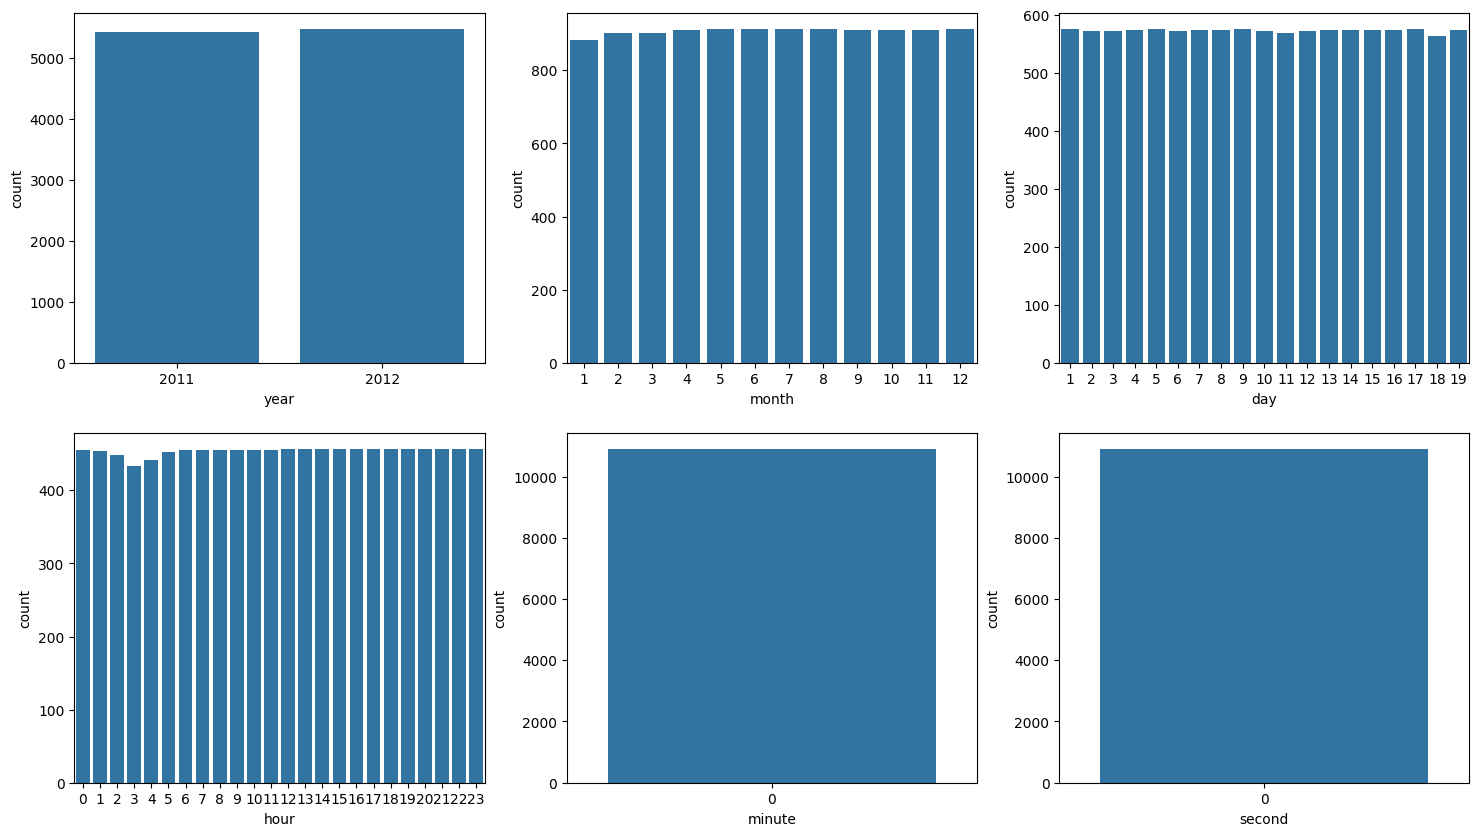

In [7]:
# 3. 날짜 데이터 개수 시각화
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(18,10))

sns.countplot(data=train, x='year', ax=ax[0,0])
sns.countplot(data=train, x='month', ax=ax[0,1])
sns.countplot(data=train, x='day', ax=ax[0,2])
sns.countplot(data=train, x='hour', ax=ax[1,0])
sns.countplot(data=train, x='minute', ax=ax[1,1])
sns.countplot(data=train, x='second', ax=ax[1,2])

<Axes: >

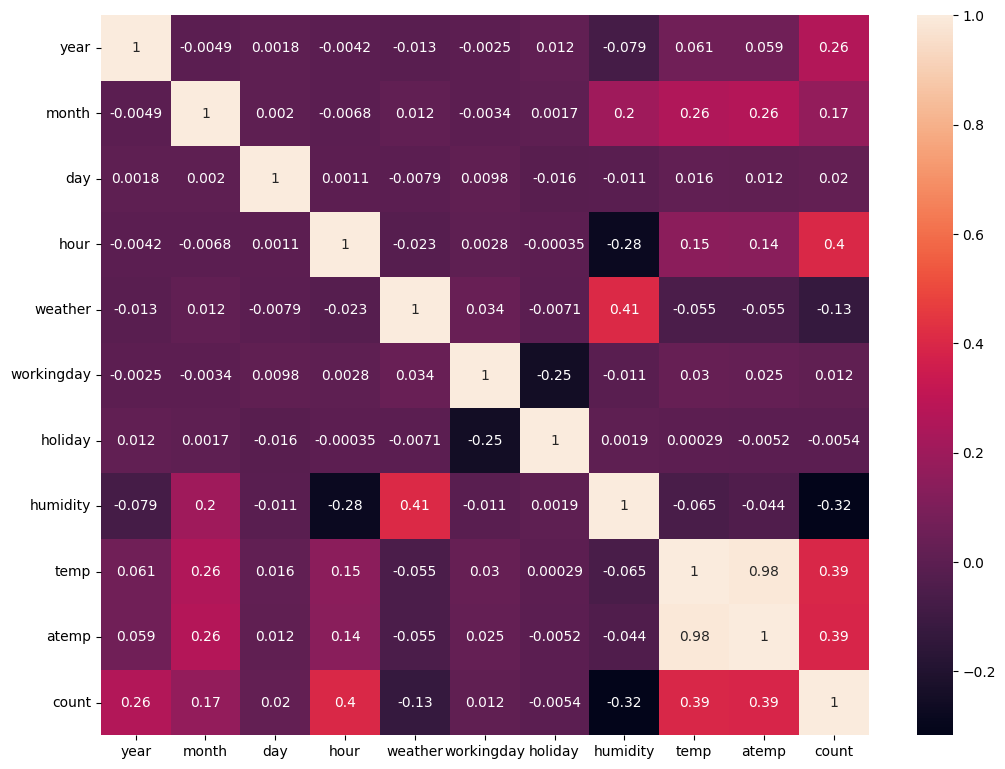

In [8]:
# custom : 각 변수들 간 상관관계 시각화
sns.heatmap(
    data=train[['year','month','day','hour','weather','workingday','holiday','humidity','temp','atemp','count']].corr(),
    annot=True,
    ax=plt.axes([0,0,1.5,1.5])
)

In [9]:
# 4. X,y 컬럼 선택 및 train/test 분리
features=['year','month','day','hour','weather','workingday','humidity','temp']
X = train[features]
y = train['count']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
# 5. LinearRegression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# 6. X_test 예측 및 손실함수값 계산
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
import numpy as np
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'mse : {mse} | rmse : {rmse}')

mse : 20602.20549762632 | rmse : 143.53468395348324


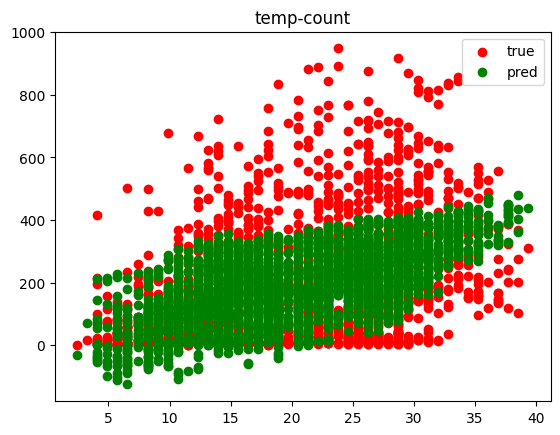

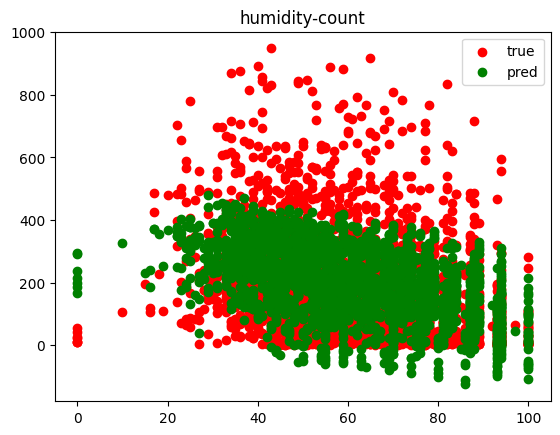

In [12]:
# 7. x:temp or humidity, y:count로 예측 결과 시각화
plt.scatter(X_test['temp'], y_test, c='red', label='true')
plt.scatter(X_test['temp'], y_pred, c='green', label='pred')
plt.title('temp-count')
plt.legend()
plt.show()

plt.scatter(X_test['humidity'], y_test, c='red', label='true')
plt.scatter(X_test['humidity'], y_pred, c='green', label='pred')
plt.title('humidity-count')
plt.legend()
plt.show()

In [13]:
# 결론
print(f'rmse : {rmse}')

rmse : 143.53468395348324
